In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import os

data_path = '/Users/misrakberhe/Desktop/Data Science/nano/Blog post/'

In [2]:
calendar = pd.read_csv(os.path.join(data_path, 'calendar.csv'))
listing = pd.read_csv(os.path.join(data_path, 'listings.csv'))
review = pd.read_csv(os.path.join(data_path, 'reviews.csv'))
listing2 = pd.read_csv(os.path.join(data_path, 'listings 2.csv'))

/Users/misrakberhe/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listing2[listing2.columns[listing2.isnull().mean() > 0.55]].isnull().mean()

thumbnail_url                   1.000000
medium_url                      1.000000
xl_picture_url                  1.000000
host_acceptance_rate            1.000000
neighbourhood_group_cleansed    1.000000
square_feet                     0.991327
weekly_price                    0.879460
monthly_price                   0.896183
license                         1.000000
jurisdiction_names              0.999896
dtype: float64

All these columns are pretty much empty. I'm going to drop them.

In [4]:
empty_cols = listing2.columns[listing2.isnull().mean() > 0.55]


In [5]:
listing_drop = listing2.drop(empty_cols, axis=1)
listing_drop.iloc[:,0:30]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count
0,1419,https://www.airbnb.com/rooms/1419,20181206023116,2018-12-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,...,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0
1,8077,https://www.airbnb.com/rooms/8077,20181206023116,2018-12-06,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,...,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,within a few hours,100%,f,https://a0.muscache.com/im/pictures/9a077853-c...,https://a0.muscache.com/im/pictures/9a077853-c...,Harbourfront,2.0,2.0
2,10314,https://www.airbnb.com/rooms/10314,20181206023116,2018-12-06,Union Inn II (Leslieville),We offer a private room for two with a queen b...,"The 'union inn' offers a clean, spacious room ...",We offer a private room for two with a queen b...,none,Our charming adopted home of Leslieville is a ...,...,"Toronto, Ontario, Canada",We are a couple of architects who try to make ...,within a day,100%,f,https://a0.muscache.com/im/pictures/53207530-d...,https://a0.muscache.com/im/pictures/53207530-d...,Riverdale,1.0,1.0
3,12604,https://www.airbnb.com/rooms/12604,20181206023116,2018-12-06,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,...,"Toronto, Ontario, Canada","I love travelling and exploring new places, ma...",NaN,NaN,f,https://a0.muscache.com/im/users/48239/profile...,https://a0.muscache.com/im/users/48239/profile...,The Annex,1.0,1.0
4,23691,https://www.airbnb.com/rooms/23691,20181206023116,2018-12-06,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,...,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,t,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0
5,26654,https://www.airbnb.com/rooms/26654,20181206023116,2018-12-06,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,NaN,...,"Toronto, Ontario, Canada",Welcome to Toronto! \r\n\r\nAfter our first me...,within a few hours,90%,f,https://a0.muscache.com/im/users/113345/profil...,https://a0.muscache.com/im/users/113345/profil...,Entertainment District,7.0,7.0
6,27423,https://www.airbnb.com/rooms/27423,20181206023116,2018-12-06,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",none,NaN,...,"Toronto, Ontario, Canada",I love to travel and meet new people from arou...,within a day,100%,f,https://a0.muscache.com/im/pictures/f687f58e-f...,https://a0.muscache.com/im/pictures/f687f58e-f...,Greenwood-Coxwell,1.0,1.0
7,28160,https://www.airbnb.com/rooms/28160,20181206023116,2018-12-06,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in 

In [6]:
to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_name',
          'host_location','host_thumbnail_url','host_picture_url','host_total_listings_count',
          'street','neighbourhood','city','state','market','smart_location','country_code','country',
          'calendar_last_scraped', 'experiences_offered']

In [7]:
listing_drop = listing_drop.drop(to_drop, axis=1)

In [8]:
listing_drop['price'] = listing_drop['price'].replace('[\$,]', '', regex=True).astype(float)
listing_drop['security_deposit'] = listing_drop['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
listing_drop['cleaning_fee'] = listing_drop['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
listing_drop['extra_people'] = listing_drop['extra_people'].replace('[\$,]', '', regex=True).astype(float)

In [9]:
final = listing_drop

In [10]:
calendar['available'] = calendar['available'].map({'f': 0, 't': 1})

In [11]:
booked_days = pd.DataFrame(calendar['available'].groupby(calendar['listing_id']).agg('sum')).reset_index(drop=True)
#how many days out of the year they are booked
booked_days.columns = ['bookings']

In [12]:
final = pd.concat([final, booked_days], axis=1)

In [13]:
tru_fal = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','require_guest_profile_picture',
'require_guest_phone_verification']

In [14]:
final = pd.concat([final,pd.get_dummies(final[tru_fal], drop_first=True)], axis=1)
final = final.drop(tru_fal, axis = 1)
final

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,cancellation_policy,calculated_host_listings_count,reviews_per_month,bookings,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t,require_guest_profile_picture_t,require_guest_phone_verification_t
0,1419,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",...,strict_14_with_grace_period,1,0.17,0,0,1,1,0,0,0
1,8077,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,NaN,NaN,NaN,NaN,NaN,...,strict_14_with_grace_period,2,1.50,365,0,1,0,1,0,1
2,10314,Union Inn II (Leslieville),We offer a private room for two with a queen b...,"The 'union inn' offers a clean, spacious room ...",We offer a private room for two with a queen b...,Our charming adopted home of Leslieville is a ...,"Clean towels, a hair dryer, soap and sanitary ...",Our home is steps from street car and bus acce...,We have high speed wireless internet for your ...,We love meeting new people. However we do work...,...,moderate,1,0.68,361,0,1,1,0,0,0
3,12604,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,NaN,NaN,NaN,NaN,NaN,...,moderate,1,NaN,0,0,1,1,0,0,0
4,23691,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,NaN,* Laundry facilities are available at the prem...,* Public transit is conveniently located about...,NaN,You are welcome to contact us at any time if t...,...,strict_14_with_grace_period,2,1.99,358,1,1,1,1,0,0
5,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",NaN,NaN,Walk everywhere! Transit at your doorstep,NaN,NaN,...,strict_14_with_grace_period,7,0.36,351,0,1,1,0,0,0
6,27423,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",NaN,NaN,NaN,NaN,"I live upstairs, so I'm available if you need ...",...,strict_14_with_grace_period,1,0.25,0,0,1,1,0,0,0
7,28160,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in Toronto's best mid...,Simply the best and safest neighbourhood in T....,NaN,The subway is a pleasant few minute walk away ...,The entire studio apartment including lovely b...,I'm a touring musician with a house 3 hours aw...,...,strict_14_with_grace_period,1,0.18,305,0,1,0,0,0,0
8,30931,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,Artists' Home With Spectacular Views! If you w...,Split level waterfront condo with a breathtaki...,NaN,NaN,NaN,NaN,NaN,...,strict_14_with_grace_period,2,0.01,365,0,1,0,0,0,1
9,40456,Entire Suite in Downtown+Parking,NaN,-----------------IMPORTANT--------------------...,-----------------IMPORTANT--------------------...,NaN,NaN,NaN,NaN,NaN,...,strict_14_with_grace_period,3,0.97,188,1,1,0,1,0,1


In [15]:
#result = set(x for l in lol for x in l)
#this will take the create a list of unique values in a column full of lists

#calendar['date'] = pd.to_datetime(calendar['date'])
#calendar['month'] = calendar['date'].dt.to_period('M')

In [16]:
lol = final['amenities'].replace('[\{"}]', '',regex=True).str.split(',')
amenities = pd.get_dummies(lol.apply(pd.Series).stack()).sum(level=0)
#this creas the dummies for the amenities columns

In [17]:
neighbour_watch = pd.DataFrame(final['neighbourhood_cleansed'].value_counts()).reset_index()
neighbour_watch

,index,neighbourhood_cleansed
0,Waterfront Communities-The Island,3443
1,Niagara,849
2,Annex,749
3,Church-Yonge Corridor,666
4,Dovercourt-Wallace Emerson-Junction,556
5,Kensington-Chinatown,526
6,Bay Street Corridor,524
7,Little Portugal,516
8,Willowdale East,488
9,Trinity-Bellwoods,471


In [18]:
def neigh(neighbourhood):
    
    code = neighbour_watch.index[neighbour_watch['index'] == neighbourhood][0]
    
    return code

In [19]:
vfunc = np.vectorize(neigh)
vfunc(final['neighbourhood_cleansed'])

array([ 7,  0, 11, ...,  0,  0,  0])

In [20]:

final['neighbourhood_cleansed_cat'] = vfunc(final['neighbourhood_cleansed'])

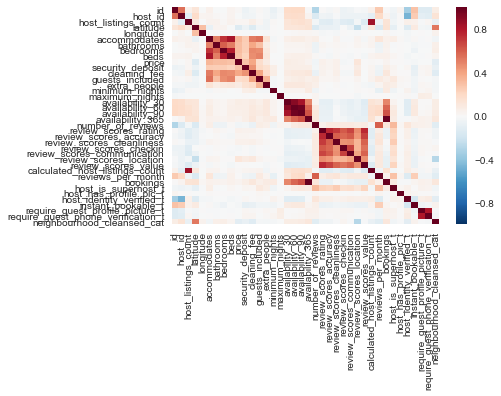

In [21]:
sns.heatmap(final.corr())

In [22]:
final2 = pd.concat([final, amenities], axis=1)

In [23]:
for col in final2.select_dtypes(include=np.number):
    final2[col] = final2[col].fillna(final2[col].median())

In [24]:
deal_withna = final2[final2.columns[final2.isnull().mean() > 0]]
deal_withna.isnull().mean()

summary                  0.032875
space                    0.300597
description              0.016152
neighborhood_overview    0.377305
notes                    0.528382
transit                  0.364425
access                   0.372007
interaction              0.403012
house_rules              0.330979
host_since               0.000156
host_about               0.414749
host_response_time       0.433861
host_response_rate       0.433861
host_neighbourhood       0.134043
zipcode                  0.021761
first_review             0.193664
last_review              0.193612
dtype: float64

In [25]:
host_and_reviews = ['host_since', 'first_review', 'last_review']
for col in host_and_reviews:
    final2[col] = pd.to_datetime(final2[col])


In [26]:
host_response = pd.get_dummies(final2['host_response_time'],dummy_na=True)
final2['host_response_rate'] = final2['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
final2['host_response_rate'] = final2['host_response_rate'].fillna(final2['host_response_rate'].mean())
final2['summary'] = len(final2['summary'].fillna(0))
final2['description'] = len(final2['description'].fillna(0))
final2['house_rules'] = len(final2['house_rules'].fillna(0))
final2['notes'] = len(final2['notes'].fillna(0))


In [27]:
room_bed_cancel = ['room_type', 'bed_type', 'cancellation_policy']
hmm = pd.get_dummies(final2[room_bed_cancel], drop_first=True)


In [28]:
deal_withna.loc[:, deal_withna.dtypes != 'datetime64[ns]']
final2 = final2.drop(deal_withna.columns[deal_withna.dtypes != 'datetime64[ns]'] , axis=1)
final2 = pd.concat([final2, host_response, hmm], axis=1)

In [29]:
final3 = final2.dropna()
final3.isnull().any().sum()

0

In [30]:
final3 = final3.drop(final3.columns[final3.dtypes == 'object'],axis=1)
final3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19255 entries, 0 to 19254
Columns: 246 entries, id to cancellation_policy_super_strict_60
dtypes: float64(18), int64(14), uint8(214)
memory usage: 8.8 MB


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linearprice = LinearRegression()
linearbooking = LinearRegression()

In [33]:
y_price = final3['price']
y_booking = final3['bookings']

linearprice.fit(final3.drop('price', axis=1), y_price)
linearbooking.fit(final3.drop('bookings', axis=1), y_booking)

/Users/misrakberhe/anaconda/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred_price = linearprice.predict(final3.drop('price', axis=1))
y_pred_booking = linearbooking.predict(final3.drop('bookings', axis=1))

In [38]:
price_coefs = list(zip(linearprice.coef_, final3.drop('price', axis=1)))
booking_coefs = list(zip(linearbooking.coef_, final3.drop('bookings', axis=1)))

In [55]:
price_coefs

[(-1.4112691299383732e-07, 'id'),
 (-2.172188818751584e-09, 'host_id'),
 (-0.3411806335056564, 'host_listings_count'),
 (-328.35811519228463, 'latitude'),
 (91.74773210511192, 'longitude'),
 (12.967867735200812, 'accommodates'),
 (54.54947723347259, 'bathrooms'),
 (17.88889289499772, 'bedrooms'),
 (-0.9566775218709376, 'beds'),
 (0.027333513203459565, 'security_deposit'),
 (0.4694929980398679, 'cleaning_fee'),
 (-7.855594670719263, 'guests_included'),
 (0.245532966927458, 'extra_people'),
 (-0.14415564278016366, 'minimum_nights'),
 (-1.3191905884832574e-09, 'maximum_nights'),
 (1.3360799787239634, 'availability_30'),
 (-0.30070727653425644, 'availability_60'),
 (0.16893636552286762, 'availability_90'),
 (0.013141926109658586, 'availability_365'),
 (-0.14048592990417702, 'number_of_reviews'),
 (0.41266151137823515, 'review_scores_rating'),
 (1.8129016595266698, 'review_scores_accuracy'),
 (3.960939481388122, 'review_scores_cleanliness'),
 (-1.9274079808978328, 'review_scores_checkin'),


In [52]:
pd.DataFrame(booking_coefs).sort_values(by=0)

,0,1
3,-1.092786e-09,latitude
5,-1.854259e-10,accommodates
12,-2.974090e-11,guests_included
29,-1.162016e-11,reviews_per_month
28,-9.177757e-12,calculated_host_listings_count
21,-4.750734e-12,review_scores_rating
18,-4.338717e-12,availability_90
2,-4.023797e-12,host_listings_count
20,-2.782094e-12,number_of_reviews
33,-2.053870e-12,instant_bookable_t


3.'Are there amenities that garner more bookings?'

There was no relation to how many bookings an AirBnB rental has in the coming year. There might be a number of reasons why the data isn't showing this. One reason might be that since this data is a snapshot from early December, there aren't many events that would bring tourists to Toronto. Summer is the best time to come to the city and it might be better to look at the data coming from closer to the summer season, when people maybe booking more in preparation.

Another reason might be that the booking data is too messy still. A thought on how to clean it better might be to seperate the dates that each place has a booking. The issue with making the dates more granular is that there will be ranges or times of the year that will be difficult to represent in a column unless I'm willing to balloon the size of the dateframe by an additional 365 columns. 

Another thought about this dataset (and the archived versions) is that it might not be entirely good for any deep analysis of booking information. There is a large chance (and I believe there is) that between the times when data is pulled, we are missing a large amount of booking information. Which would make the data related to bookings less reliable and harder to tie to the amenities.


The three questions I'm going to ask are:

1. 'What is the most profitable pricing for Airbnb's in Toronto?'
2. 'What the most advantageous availabliity?'
3. 'Are there amenities that garner more bookings?'